In [110]:
import pandas as pd
import numpy as np

from pathlib import Path
from pgmpy.readwrite import BIFReader
from src.utils import adj_df_from_BIF
from src.constants import HEPAR_TARGET

from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [54]:
fpath_adj1 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_160706_training_record/adj_mat.npy")
fpath_adj2 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_161647_training_record/adj_mat.npy")
fpath_adj3 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_070642_training_record/adj_mat.npy")
fpath_adj4 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_071110_training_record/adj_mat.npy")
fpath_adj5 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_071319_training_record/adj_mat.npy")
fpath_adj6 = Path("/home/gaurang/bayesian_network/experiments/edge_weights/hepar/20230302_071742_training_record/adj_mat.npy")

fpath_bif = Path("/home/gaurang/bayesian_network/data/hepar/hepar2.bif")

In [9]:
bn = BIFReader(fpath_bif)
adj_df = adj_df_from_BIF(bn, HEPAR_TARGET)

In [13]:
adj_mat_gt = adj_df.to_numpy()

(70, 70)

In [15]:
adj_mat_gt.sum()

123.0

In [97]:
adj_mat1 = np.load(fpath_adj1, allow_pickle=True)
adj_mat2 = np.load(fpath_adj2, allow_pickle=True)
# adj_mat3 = np.load(fpath_adj3, allow_pickle=True)
# adj_mat4 = np.load(fpath_adj4, allow_pickle=True)
# adj_mat5 = np.load(fpath_adj5, allow_pickle=True)
# adj_mat6 = np.load(fpath_adj6, allow_pickle=True)

In [98]:
adj_mat1 = np.mean(adj_mat1, axis=0)
adj_mat2 = np.mean(adj_mat2, axis=0)

In [99]:
adj_mat1 = (adj_mat1 > 0.155).astype(float)

In [100]:
adj_mat2 = (adj_mat2 > 0.044).astype(float)

In [101]:
np.equal(adj_mat1, adj_mat2).mean()

0.9759183673469388

In [103]:
adj_mat1.flatten().shape

(4900,)

In [107]:
print(precision_score(adj_mat1.flatten(), adj_mat2.flatten()))
print(recall_score(adj_mat1.flatten(), adj_mat2.flatten()))

0.016666666666666666
0.016666666666666666


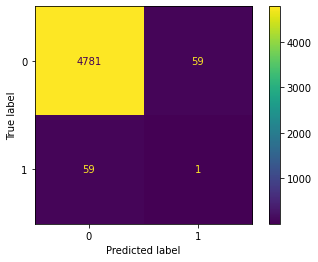

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix(adj_mat2.flatten(), adj_mat1.flatten()))
disp.plot()